In [1]:
import sys
sys.path.insert(0, '/10 A KAI 2/week 9/Oile_Price_Analysis/')
import pandas as pd

In [ ]:
from script.TimeSeries_model import TimeSeriesModeling

In [3]:
# Example Usage
# Load your merged_data DataFrame
merged_data = pd.read_csv('merged_data.csv', parse_dates=['Date'], index_col='Date')

In [4]:
merged_data

,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (USD),Price
Date,,,,,
1987-05-20,3.724627,5.710119,NaN,NaN,18.63
1987-05-21,3.724627,5.710119,NaN,NaN,18.45
1987-05-22,3.724627,5.710119,NaN,NaN,18.55
1987-05-25,3.724627,5.710119,NaN,NaN,18.60
1987-05-26,3.724627,5.710119,NaN,NaN,18.63
...,...,...,...,...,...
2022-11-08,3.089607,7.967574,5.264616,NaN,96.85
2022-11-09,3.089607,7.967574,5.264616,NaN,93.05
2022-11-10,3.089607,7.967574,5.264616,NaN,94.25


In [5]:
merged_data = merged_data.drop(columns=['Exchange Rate (USD)'])

In [6]:
merged_data['Unemployment Rate (%)'].fillna(merged_data['Unemployment Rate (%)'].mean(), inplace=True)

C:\Users\marta\AppData\Local\Temp\ipykernel_11760\207508523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Unemployment Rate (%)'].fillna(merged_data['Unemployment Rate (%)'].mean(), inplace=True)


In [7]:
merged_data

,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Price
Date,,,,
1987-05-20,3.724627,5.710119,6.009630,18.63
1987-05-21,3.724627,5.710119,6.009630,18.45
1987-05-22,3.724627,5.710119,6.009630,18.55
1987-05-25,3.724627,5.710119,6.009630,18.60
1987-05-26,3.724627,5.710119,6.009630,18.63
...,...,...,...,...
2022-11-08,3.089607,7.967574,5.264616,96.85
2022-11-09,3.089607,7.967574,5.264616,93.05
2022-11-10,3.089607,7.967574,5.264616,94.25


In [8]:
ts_model = TimeSeriesModeling(merged_data)

In [9]:
ts_model.preprocess_data()

Data preprocessed. Rows after cleaning: 9011


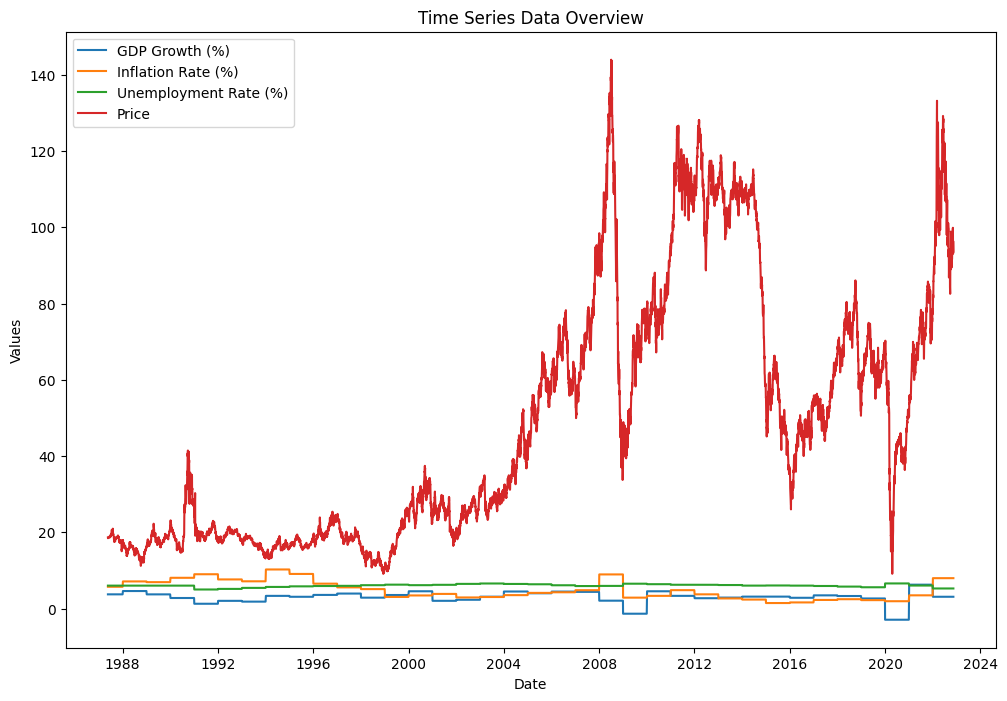

In [10]:
ts_model.plot_time_series()


Augmented Dickey-Fuller test for GDP Growth (%):
Test Statistic: -4.449383554498813
p-value: 0.00024247031104835908
Critical Values: {'1%': np.float64(-3.431075989347341), '5%': np.float64(-2.8618608402236996), '10%': np.float64(-2.566940778220278)}


d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


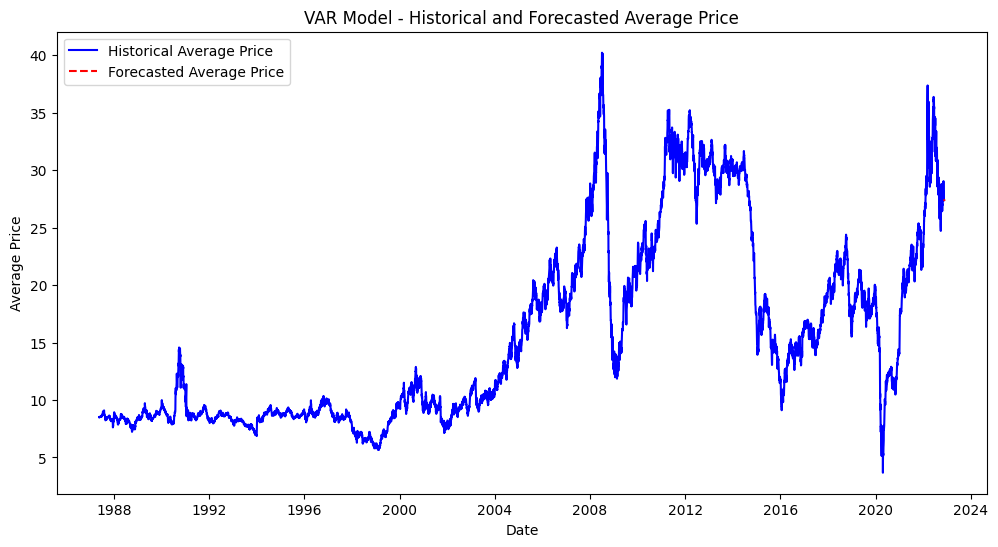

VAR model fitted, forecasted, and plotted (average values).
VAR - MSE: 0.7551142552518054, MAE: 0.6933954830608403


,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Price
2022-11-15,3.083005,7.966664,5.265154,93.534350
2022-11-16,3.076436,7.965748,5.265692,93.478687
2022-11-17,3.069901,7.964825,5.266230,93.423012
2022-11-18,3.063398,7.963895,5.266768,93.367325
2022-11-19,3.056928,7.962958,5.267306,93.311627
2022-11-20,3.050491,7.962014,5.267844,93.255917
2022-11-21,3.044086,7.961063,5.268382,93.200197
2022-11-22,3.037713,7.960106,5.268919,93.144467
2022-11-23,3.031373,7.959142,5.269457,93.088726
2022-11-24,3.025065,7.958171,5.269995,93.032977


In [11]:
ts_model.fit_var_model()

d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0471 - val_loss: 5.0033e-04
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2417e-04 - val_loss: 4.8135e-04
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9924e-04 - val_loss: 4.3947e-04
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8552e-04 - val_loss: 4.3186e-04
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9589e-04 - val_loss: 3.8601e-04
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9479e-04 - val_loss: 3.7222e-04
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.8071e-04 - val_loss: 3.3761e-04
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.5844e-04 - val_loss: 3.1565e-04
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3728e-04 - val_loss: 2.9814e-04
Epoch 10/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4806e-04 - val_loss: 2.8553e-04
Epoch 11/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1

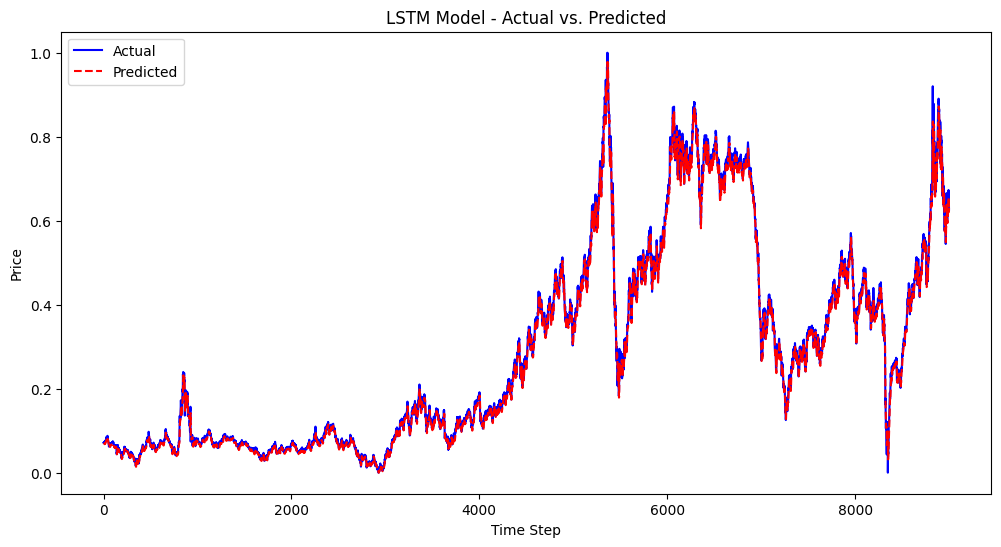

In [12]:
ts_model.fit_lstm_model('Price')

Augmented Dickey-Fuller test for Price:
Test Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
Differencing Price for stationarity.


d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

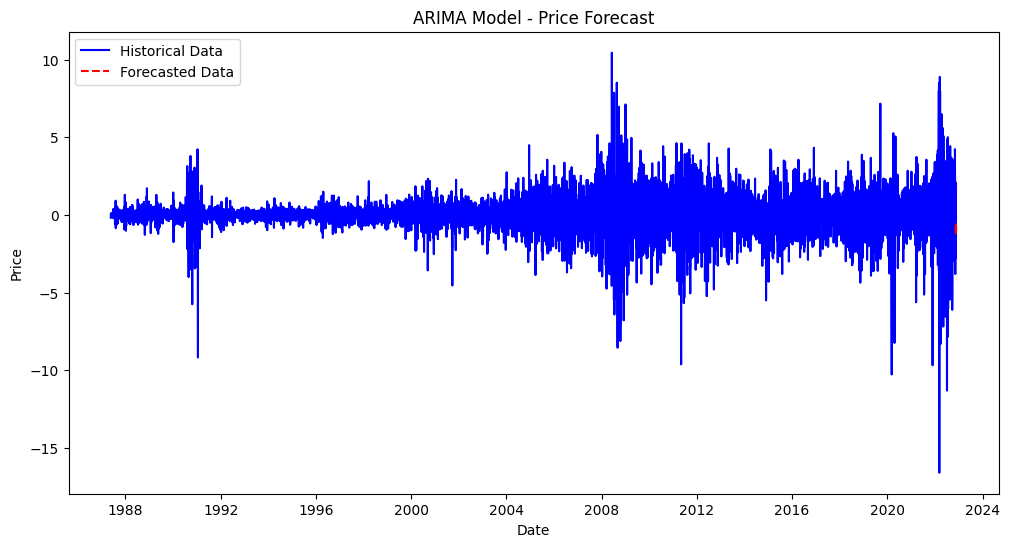

ARIMA model fitted, forecasted, and plotted.
ARIMA - MSE: 6.620100098113501, MAE: 2.277326106571016


Price,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-11-15,-1.241340,1.319225,-3.826974,1.344294
2022-11-16,-1.081157,1.345044,-3.717395,1.555081
2022-11-17,-0.734418,1.366942,-3.413576,1.944739
2022-11-18,-0.543908,1.401138,-3.290088,2.202273
2022-11-19,-0.830049,1.456160,-3.684071,2.023973
2022-11-20,-1.138520,1.519815,-4.117303,1.840263
2022-11-21,-0.919195,1.586456,-4.028592,2.190203
2022-11-22,-0.853121,1.625453,-4.038950,2.332707
2022-11-23,-0.839371,1.666747,-4.106135,2.427393
2022-11-24,-0.873552,1.711945,-4.228902,2.481798


In [13]:
ts_model.fit_arima_model('Price')

Augmented Dickey-Fuller test for Price:
Test Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
Differencing Price for stationarity.


d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


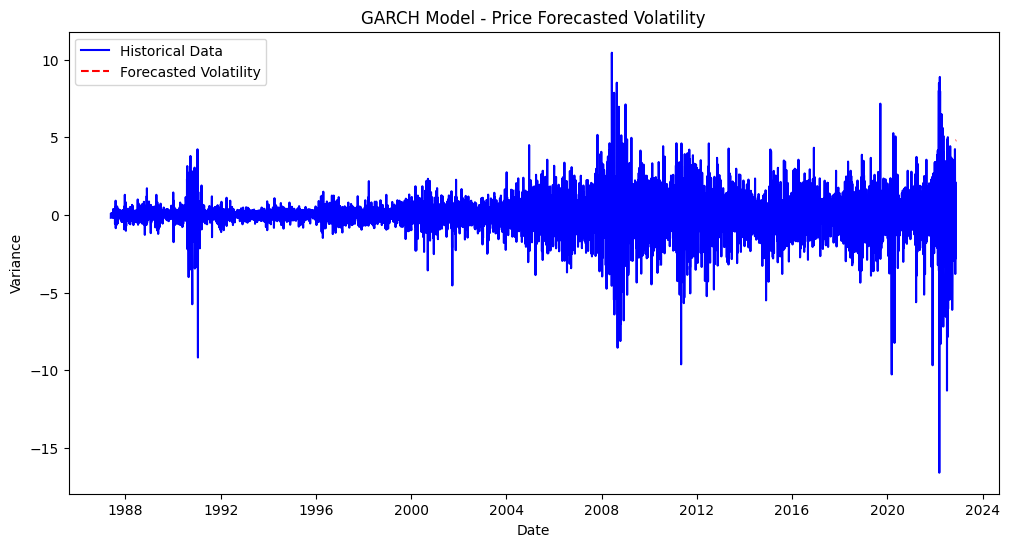

GARCH model fitted, forecasted, and plotted.


array([4.79841899, 4.79976293, 4.80110696, 4.80245107, 4.80379526,
       4.80513953, 4.80648389, 4.80782834, 4.80917286, 4.81051748])

In [14]:
# Display metrics for all fitted models
ts_model.fit_garch_model('Price')

Augmented Dickey-Fuller test for Price:
Test Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
Differencing Price for stationarity.


d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


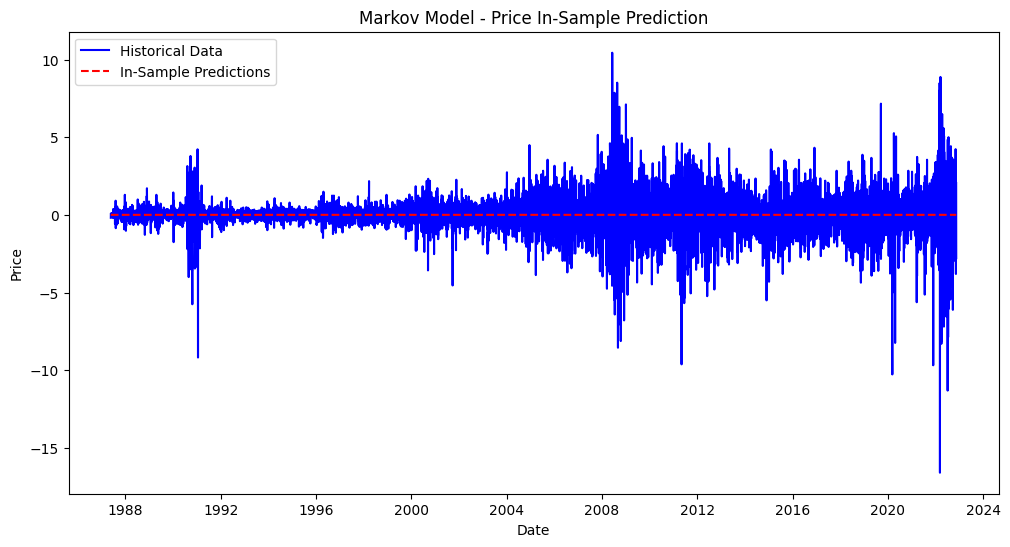

Markov model fitted and in-sample predictions plotted.
Markov - MSE: 1.479035450837642, MAE: 0.7496505889508539


Date
1987-05-21    0.008319
1987-05-22    0.008320
1987-05-25    0.008320
1987-05-26    0.008320
1987-05-27    0.008320
                ...   
2022-11-08    0.008311
2022-11-09    0.008309
2022-11-10    0.008323
2022-11-11    0.008326
2022-11-14    0.008311
Length: 9010, dtype: float64

In [15]:
ts_model.fit_markov_model('Price')

In [16]:
ts_model.save_metrics_to_csv()

Performance metrics saved to model_performance_metrics.csv


# Model Comparison for oile Price Forecasting

This document compares the performance of different models used for time series forecasting based on two error metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE). Lower values for both metrics indicate better model performance.

| Model       | MSE            | MAE           | Notes                                                                                         |
|-------------|----------------|---------------|-----------------------------------------------------------------------------------------------|
| **VAR**     | 0.7551         | 0.6934        | Decent performance with relatively low error values. VAR can be effective for multivariate time series data. |
| **LSTM**    | 0.00016        | 0.0089        | Best performance among the models. LSTM’s low error suggests it captures underlying patterns well, especially for nonlinear or sequential data. |
| **ARIMA**   | 6.6201         | 2.2773        | Highest error, which may indicate that ARIMA is not well-suited for this dataset. It may struggle with complex or nonstationary patterns. |
| **Markov**  | 1.4790         | 0.7497        | Performs moderately, between VAR and ARIMA. Suitable if the data has regime-switching characteristics, but less effective with continuous time dependencies. |

### Summary
- **LSTM** shows the lowest MSE and MAE, indicating it has the highest predictive accuracy and is well-suited for this data.
- **VAR** and **Markov** models could still be beneficial, particularly if the data has multivariate relationships or regime shifts.
- **ARIMA** shows the highest error, which suggests it may not be suitable for the data patterns in this case.

Based on these results, **LSTM** is the preferred model for accurate predictions, while **VAR** and **Markov** could provide additional insights depending on the specific characteristics of the data.
